In [1]:
# !unzip "drive/MyDrive/Dog_Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog_Vision/"

In [2]:
#importing tensor flow in collab

import tensorflow as tf
import tensorflow_hub as hub
print("Tensor Flow Version: ", tf.__version__)
print("Hub version:",hub.__version__)

Tensor Flow Version:  2.18.0
Hub version: 0.16.1


In [3]:
#224) using a gpu
#check for gpu availability

print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU not available


In [4]:
## Getting our data ready(turning into Tensors)
#chekcoutthe labels of our data

import pandas as pd
labels_csv =pd.read_csv("drive/MyDrive/Dog_Vision/labels.csv")
print(labels_csv.describe())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [5]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

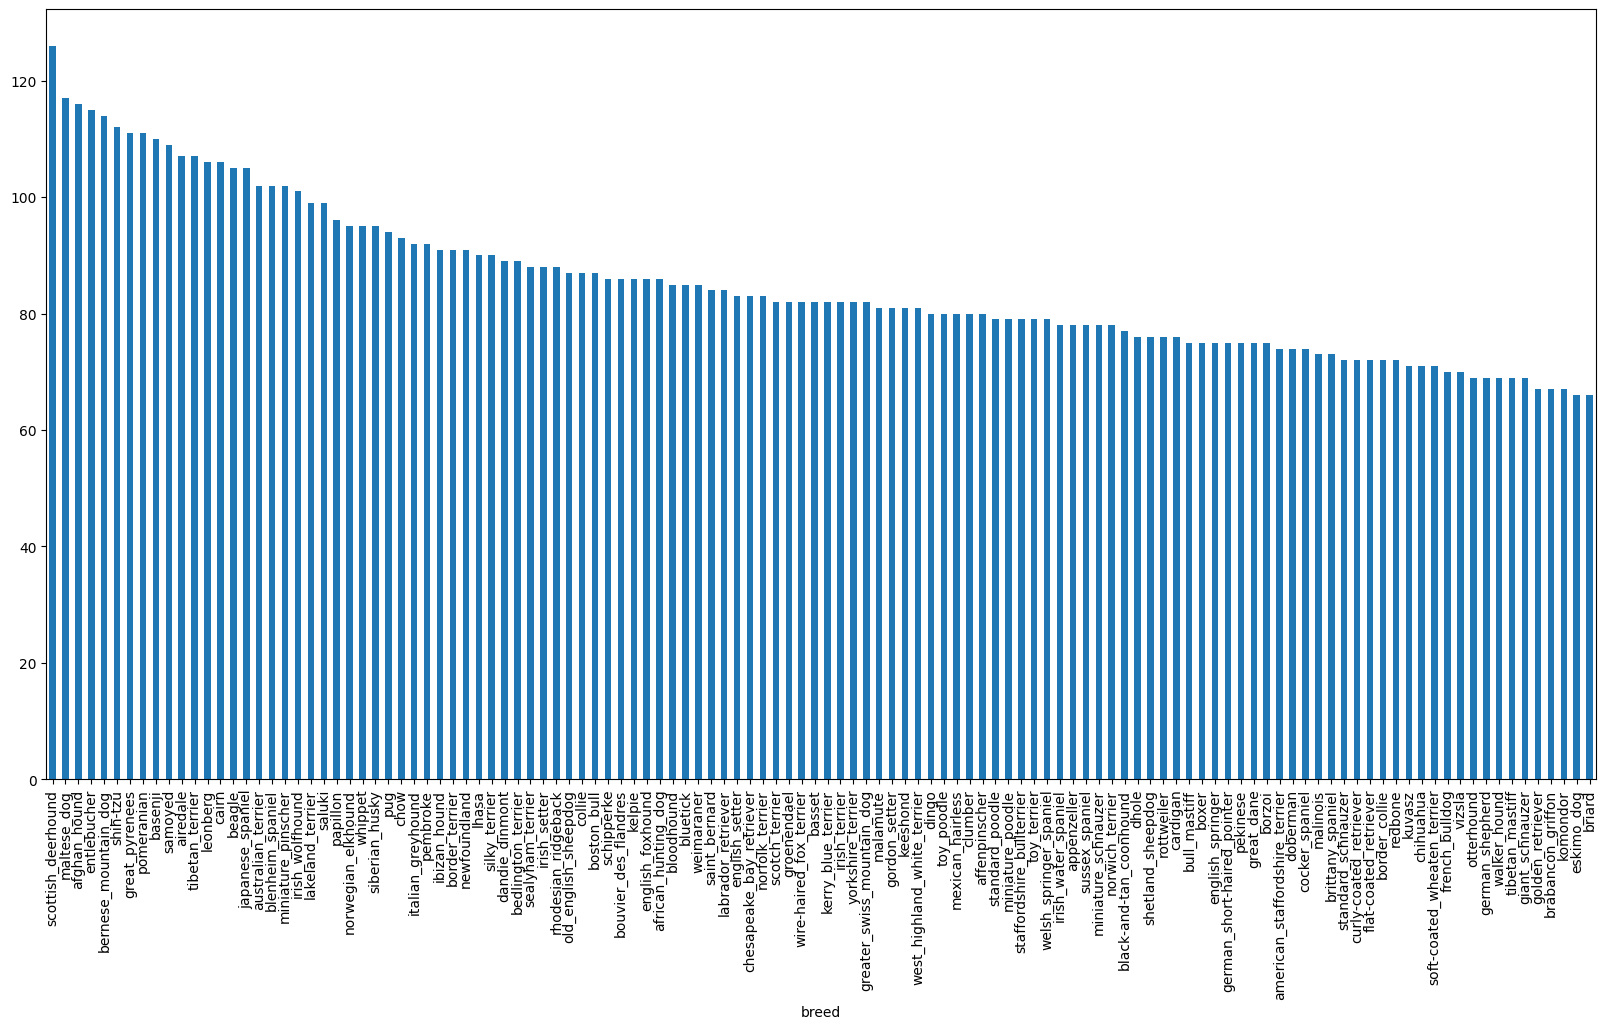

In [6]:
#how many images are there of each breed?

labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [7]:
labels_csv["breed"].value_counts().median()

82.0

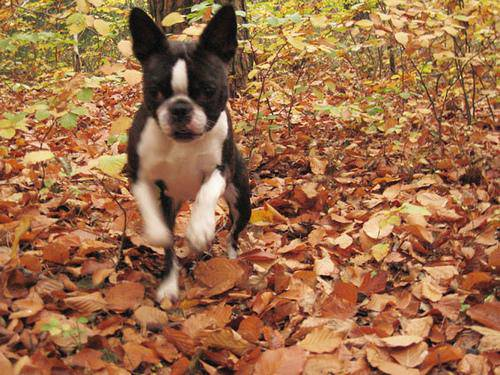

In [8]:
#lets view an image

from IPython.display import Image
Image("/content/drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [9]:
##lets get a list of all our images ID:
labels_csv.head()



,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [10]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [11]:
#create pathnames from images id

filenames=["drive/MyDrive/Dog_Vision/train/"+fname+".jpg" for fname in labels_csv["id"]]
#check the first 10
filenames[:10]

['drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog_Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog_Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog_Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog_Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog_Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog_Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog_Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog_Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [12]:
#check if number of filename matches number of actual image files

import os
if len(os.listdir("drive/MyDrive/Dog_Vision/train/"))==len(filenames):
  print("Filenames match actual amout of files!!! Proceed.")
else:
  print("Filenames do not match acutal amout of files,check the target directory.")

Filenames match actual amout of files!!! Proceed.


In [13]:
import os
os.listdir("drive/MyDrive/Dog_Vision/train")[:10]


['de14c220f31820f5c9e13ee876d95a8a.jpg',
 'dc144b931fbfbd2cefa8718b9a2cd5f2.jpg',
 'e6f837210a5b4c4f171b21f3a43ae12b.jpg',
 'ddc8d051c9b476c1eef9d35566490e59.jpg',
 'dc3d4d214533950f6465ec2483af39c0.jpg',
 'de33550ba1323a0376fc1292a1d25d71.jpg',
 'dd3509cbfcfc094e5e4726b648a26048.jpg',
 'e6898f5cc43bb4a30970f2d2210fdb9a.jpg',
 'dfc12676704c8931010ff087e117d2f2.jpg',
 'e0010a83e9302a3abef2ca9b57f9c38b.jpg']

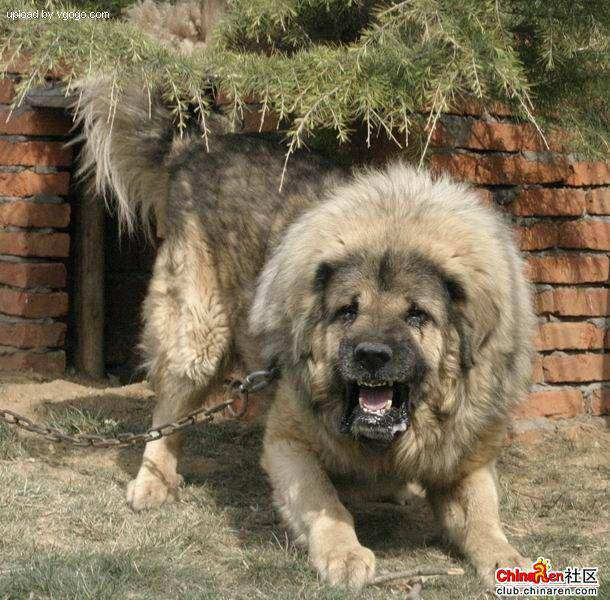

In [14]:
from IPython.display import Image
Image(filenames[9000])

In [15]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [16]:
print(filenames[7000])


drive/MyDrive/Dog_Vision/train/af750c18726a7dd02f0880a9bf662e31.jpg


In [17]:
import os

file_path = filenames[7000]
print(f"File path: {file_path}")
print(f"Does the file exist? {os.path.exists(file_path)}")


File path: drive/MyDrive/Dog_Vision/train/af750c18726a7dd02f0880a9bf662e31.jpg
Does the file exist? True


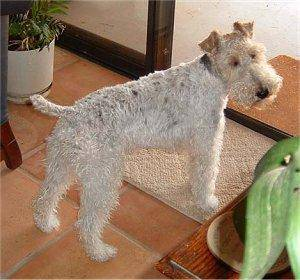

In [18]:
from IPython.display import Image, display

# Assuming `filenames[7000]` contains a valid path
display(Image(filename=filenames[7000]))


In [19]:
labels_csv["breed"][7000]

'wire-haired_fox_terrier'

In [20]:
import numpy as np
labels=labels_csv["breed"].to_numpy()
labels


array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [21]:
len(labels)

10222

In [22]:
# 229) see if numbe of labels matches the numbe of filenames

if len(labels)==len(filenames):
  print("Number of labels matches number of filenames")
else:
  print("Number of labels does not match number of filenames")


Number of labels matches number of filenames


In [23]:
# find the unique lable values

unique_breeds=np.unique(labels)
len(unique_breeds)


120

In [24]:
# turn a single label into an arrays of booleans

print (labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [25]:
# turn every label into a boolean array:
boolean_labels = [label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [26]:
len(boolean_labels)

10222

In [27]:
# example turning boolean array into integers\

print(labels[0]) #original label
print(np.where(unique_breeds == labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 whre the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [28]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [29]:
filenames[:10]

['drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog_Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog_Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog_Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog_Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog_Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog_Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog_Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog_Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [30]:
# setup x and y variable
X=filenames
y=boolean_labels


In [31]:
len(filenames)

10222

In [32]:
#going to start off experimenting with 1000 images and increase as neede

#set number of images to use for experimenting

NUM_IMAGES =1000 #@param {type:"slider",min:1000,max:10000,step:1000}

In [33]:
#Lets split out data into traina and validatio sets

from sklearn.model_selection import train_test_split

#split then into training and validation of total size NUM_IMAGES
X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                               y[:NUM_IMAGES],
                                               test_size=0.2,
                                               random_state=42)
len(X_train),len(y_train),len(X_val),len(y_val)

(800, 800, 200, 200)

In [34]:
# lets have a gaze at the training data

X_train[:5],y_train[:2]

(['drive/MyDrive/Dog_Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog_Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog_Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Dog_Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Dog_Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

In [35]:
# Preprocessing Images(turn images into Tensors)
#search:tensorflow data loading

#convert image into numpy:

from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape

(257, 350, 3)

In [36]:
# what is color channel? RGB color channel(257,250,3)

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
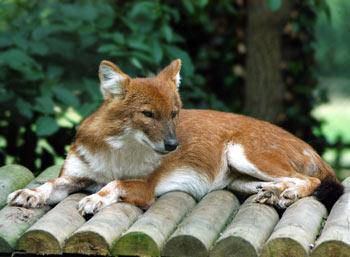

In [37]:
image

In [38]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [39]:
image.max(),image.min()

(255, 0)

In [40]:
#turn image into a tensor

tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [41]:
#defien image size

IMG_SIZE=224
#create a function for preprocessing images
def process_image(image_path,img_size=IMG_SIZE):
  #read in an image file
  image=tf.io.read_file(image_path)
  #turn the jpeg image into numerical tensor with 3 colour channels(Red,Green,Blue)
  image=tf.image.decode_jpeg(image,channels=3)
  #convert the color channel values from 0-255 to 0-1 value
  image=tf.image.convert_image_dtype(image,tf.float32)
  # #resize the image to our desired value(224,224)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image


In [42]:
# for creating data into batches:
#create a simple function to return a tuple(image,label)

def get_image_label(image_path,label):
  """
  takes an image file path name and the associated label,
  processes the image and returns a tuple of (image,label)
  """
  image=process_image(image_path)
  return image,label

In [43]:
#demo of the above;
(process_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [44]:
# 242) turning data into batches 2:
BATCH_SIZE=32
#create a function to turn data into bathces

def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels)."""

#if the data is test datset,we probably dont have labels
  if test_data:
    print("Creating test data batches...")
    data=tf.data.Dataset.from_tensor_slices(tf.constant(X)) #only filepaths
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  #if the data is a valid dataset,we dont need to shuffle it
  elif valid_data:
      print("Creating validation data batches...")
      data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
      data_batch=data.map(get_image_label).batch(BATCH_SIZE)
      return data_batch

# if the data is a  train dataset
  else:
      print("Creating training data batches...")
      #turn filepaths and labels into Tensors
      data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
      # shuffling pathnames and labels before mapping image processor fuction is faster than shuffling
      data=data.shuffle(buffer_size=len(X))

    #create (image,label) tuples (this also turns the image path into a preprocessed image)
      data=data.map(get_image_label)

    #turn the data into batches
      data_batch=data.batch(BATCH_SIZE)
      return data_batch




In [45]:
# # Create training and validation data batches

train_data=create_data_batches(X_train,y_train)
val_data=create_data_batches(X_val,y_val,valid_data=True)

Creating training data batches...
Creating validation data batches...


In [46]:
# check out the difference attributes of out data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [47]:
# 235) visualizing our data:
import matplotlib.pyplot as plt

#create a function for viewing images in a data batch

def show_25_images(images,labels):
  """
  this function plots data_batch of images.
  """
  #setup the figure
  plt.figure(figsize=(  10,10))
  #loop through 25 images
  for i in range(25):
    #create subplots (5 rows,5 columns)
    ax=plt.subplot(5,5,i+1)
    #display an image
    plt.imshow(images[i])
    #add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #turn the grid lines off
    # plt.axis("off")
    plt.axis("off")

In [48]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [49]:
# train_image,train_labels=next(train_data.as_numpy_iterator())
# len(train_image),len(train_labels)

In [50]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [51]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [52]:
#now lets visualize the data in a training batch

# show_25_images(train_image,train_labels)

In [53]:
#now lets visualize our validation set

# val_images,val_labels=next(val_data.as_numpy_iterator())
# show_25_images(val_images,val_labels)

In [54]:
# Building a model
# !pip install --upgrade tensorflow tensorflow-hub

In [55]:
import tensorflow as tf
import keras
from keras import layers

In [56]:
from tensorflow import keras
from tensorflow.keras import layers

In [57]:
# Setup input shape to the model
INPUT_SHAPE = [None,IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [58]:
INPUT_SHAPE

[None, 224, 224, 3]

In [59]:
# libraries' import
import os
import pandas as pd
import numpy as np
import datetime
import random

import tensorflow as tf
import tensorflow_hub as hub
import tf_keras as tfk

from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [60]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tfk.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tfk.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tfk.losses.CategoricalCrossentropy(),
      optimizer=tfk.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [61]:
# # Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [62]:
# load tensorboard notebook extension

%load_ext tensorboard


In [63]:
import datetime

#create a function to build a TensorBoard callback

def create_tensorboard_callback():
  #create a log directory for storing TensorBoard logs
  log_dir=os.path.join("drive/MyDrive/Dog_Vision/logs",
                       #make it so the logs get tracked whenever we run as experiment:
                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tfk.callbacks.TensorBoard(log_dir)


In [64]:
###Early stoppin callback

#create early stopping callback

early_stopping =tfk.callbacks.EarlyStopping(monitor="val_accuracy",
                                                 patience=3)


In [65]:
# Traininga model(on subset of data)
NUM_EPOCHS = 100 #@param {type:"slider",min:10,max:100,step:10}

In [66]:
# checek to make sure we're still running on a GPU

In [67]:
# lets create a function which trains a model.
#create a model using "create_model()"
#.......

In [68]:
# build a function to train and reutrn a trained model;
def train_model():
  """
  Trains a given model and return the trained version.

  """
  # create a model
  model=create_model()

  # create new TensorBoard session everytime we train a model
  tensorboard=create_tensorboard_callback()

  #fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])

  # return the fitted model
  return model



In [69]:
# fit the model to the data
# model=train_model()

In [70]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [71]:
# making and evaluatind predictions using a trained model:(not used to train on)

predictions=model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 188s 30s/step


array([[0.02979136, 0.00444072, 0.03734427, ..., 0.0063308 , 0.00023871,
        0.00895923],
       [0.00746995, 0.00436545, 0.00127522, ..., 0.00797163, 0.001304  ,
        0.00105925],
       [0.00252637, 0.00701738, 0.00656231, ..., 0.00839138, 0.0018072 ,
        0.00972403],
       ...,
       [0.00019665, 0.00083959, 0.04152447, ..., 0.00775405, 0.01936242,
        0.04969163],
       [0.00335167, 0.00303189, 0.00871652, ..., 0.00338004, 0.00024027,
        0.0099372 ],
       [0.00107758, 0.00340374, 0.00108306, ..., 0.00542836, 0.00091109,
        0.03119384]], dtype=float32)

In [72]:
predictions[0]

array([0.02979136, 0.00444072, 0.03734427, 0.00096986, 0.00048967,
       0.00599361, 0.00046906, 0.00315632, 0.00291961, 0.00738917,
       0.00890023, 0.00534936, 0.01210096, 0.00599384, 0.02363638,
       0.00251757, 0.00104628, 0.00223557, 0.0021982 , 0.00303744,
       0.00347763, 0.00989935, 0.00142041, 0.00219082, 0.00067588,
       0.00601971, 0.00954203, 0.00365905, 0.00276863, 0.00104417,
       0.01062801, 0.01361172, 0.00927213, 0.00018537, 0.00118988,
       0.00334892, 0.01464305, 0.00042487, 0.00197036, 0.00544781,
       0.00035204, 0.01189616, 0.00243736, 0.00216166, 0.00256651,
       0.00065098, 0.00931437, 0.01331495, 0.01975738, 0.02059673,
       0.01959177, 0.00491058, 0.00229755, 0.00109501, 0.00049601,
       0.00084987, 0.0089479 , 0.07107655, 0.01260487, 0.01137213,
       0.00720532, 0.0052323 , 0.00234586, 0.00425934, 0.00869199,
       0.00057712, 0.00209773, 0.03520583, 0.00106661, 0.00212016,
       0.01161852, 0.00416495, 0.00445513, 0.00640055, 0.00132

In [73]:
# first predictions

index=42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[0.00047594 0.00378934 0.00332794 0.00489859 0.01250311 0.00203394
 0.02167497 0.00861565 0.00600922 0.01055745 0.00261691 0.00833423
 0.00427959 0.01392276 0.00175939 0.00336632 0.00169491 0.00451092
 0.00212548 0.02401242 0.00428586 0.00528648 0.00337272 0.00041716
 0.01370816 0.00325001 0.00269174 0.01838092 0.00680772 0.00397806
 0.04358154 0.00683264 0.00280001 0.00464249 0.04192792 0.00535982
 0.00371453 0.0020594  0.00059667 0.00042888 0.00179405 0.00505567
 0.01065448 0.00192632 0.00067861 0.00170562 0.00083748 0.00345973
 0.0023952  0.00424618 0.00415581 0.00353914 0.00149972 0.00123395
 0.00241028 0.00486381 0.02303035 0.00405865 0.04225878 0.00709943
 0.01309985 0.02127595 0.0137659  0.02671786 0.00119729 0.00522182
 0.00463012 0.00057021 0.00421411 0.00330412 0.00416307 0.00211105
 0.00156011 0.00340427 0.01586385 0.00093205 0.00312297 0.02148261
 0.01342421 0.00266239 0.00470564 0.00049746 0.00503248 0.00452766
 0.00034762 0.0599376  0.00357052 0.00689273 0.00778161 0.0393

In [74]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [75]:
unique_breeds[y[42].argmax()]

'dhole'

In [76]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'afghan_hound'

In [77]:

val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [78]:
# create a function to unbatch a batch dataset:
def unbatchify(data):
  """
  takes a batched dataset of (image,label) Tensors and returns seperate arrays
  of images and labels.
  """
  images=[]
  labels=[]
  #loop through unbatched data
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images,labels

  #unbatchify the validation data
val_images,val_labels=unbatchify(val_data)
val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [79]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

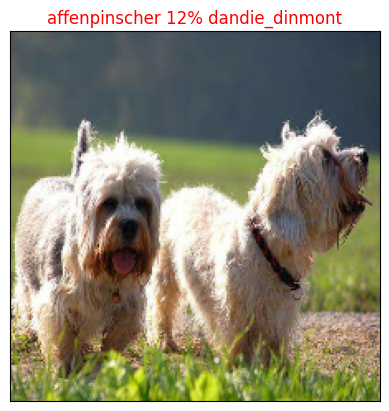

In [80]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=65)

In [81]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

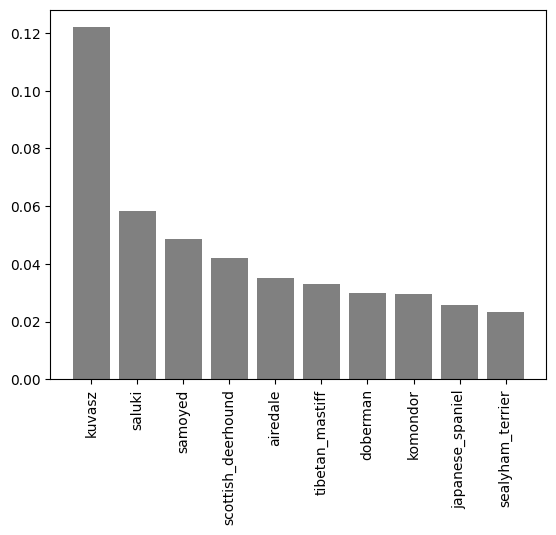

In [82]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

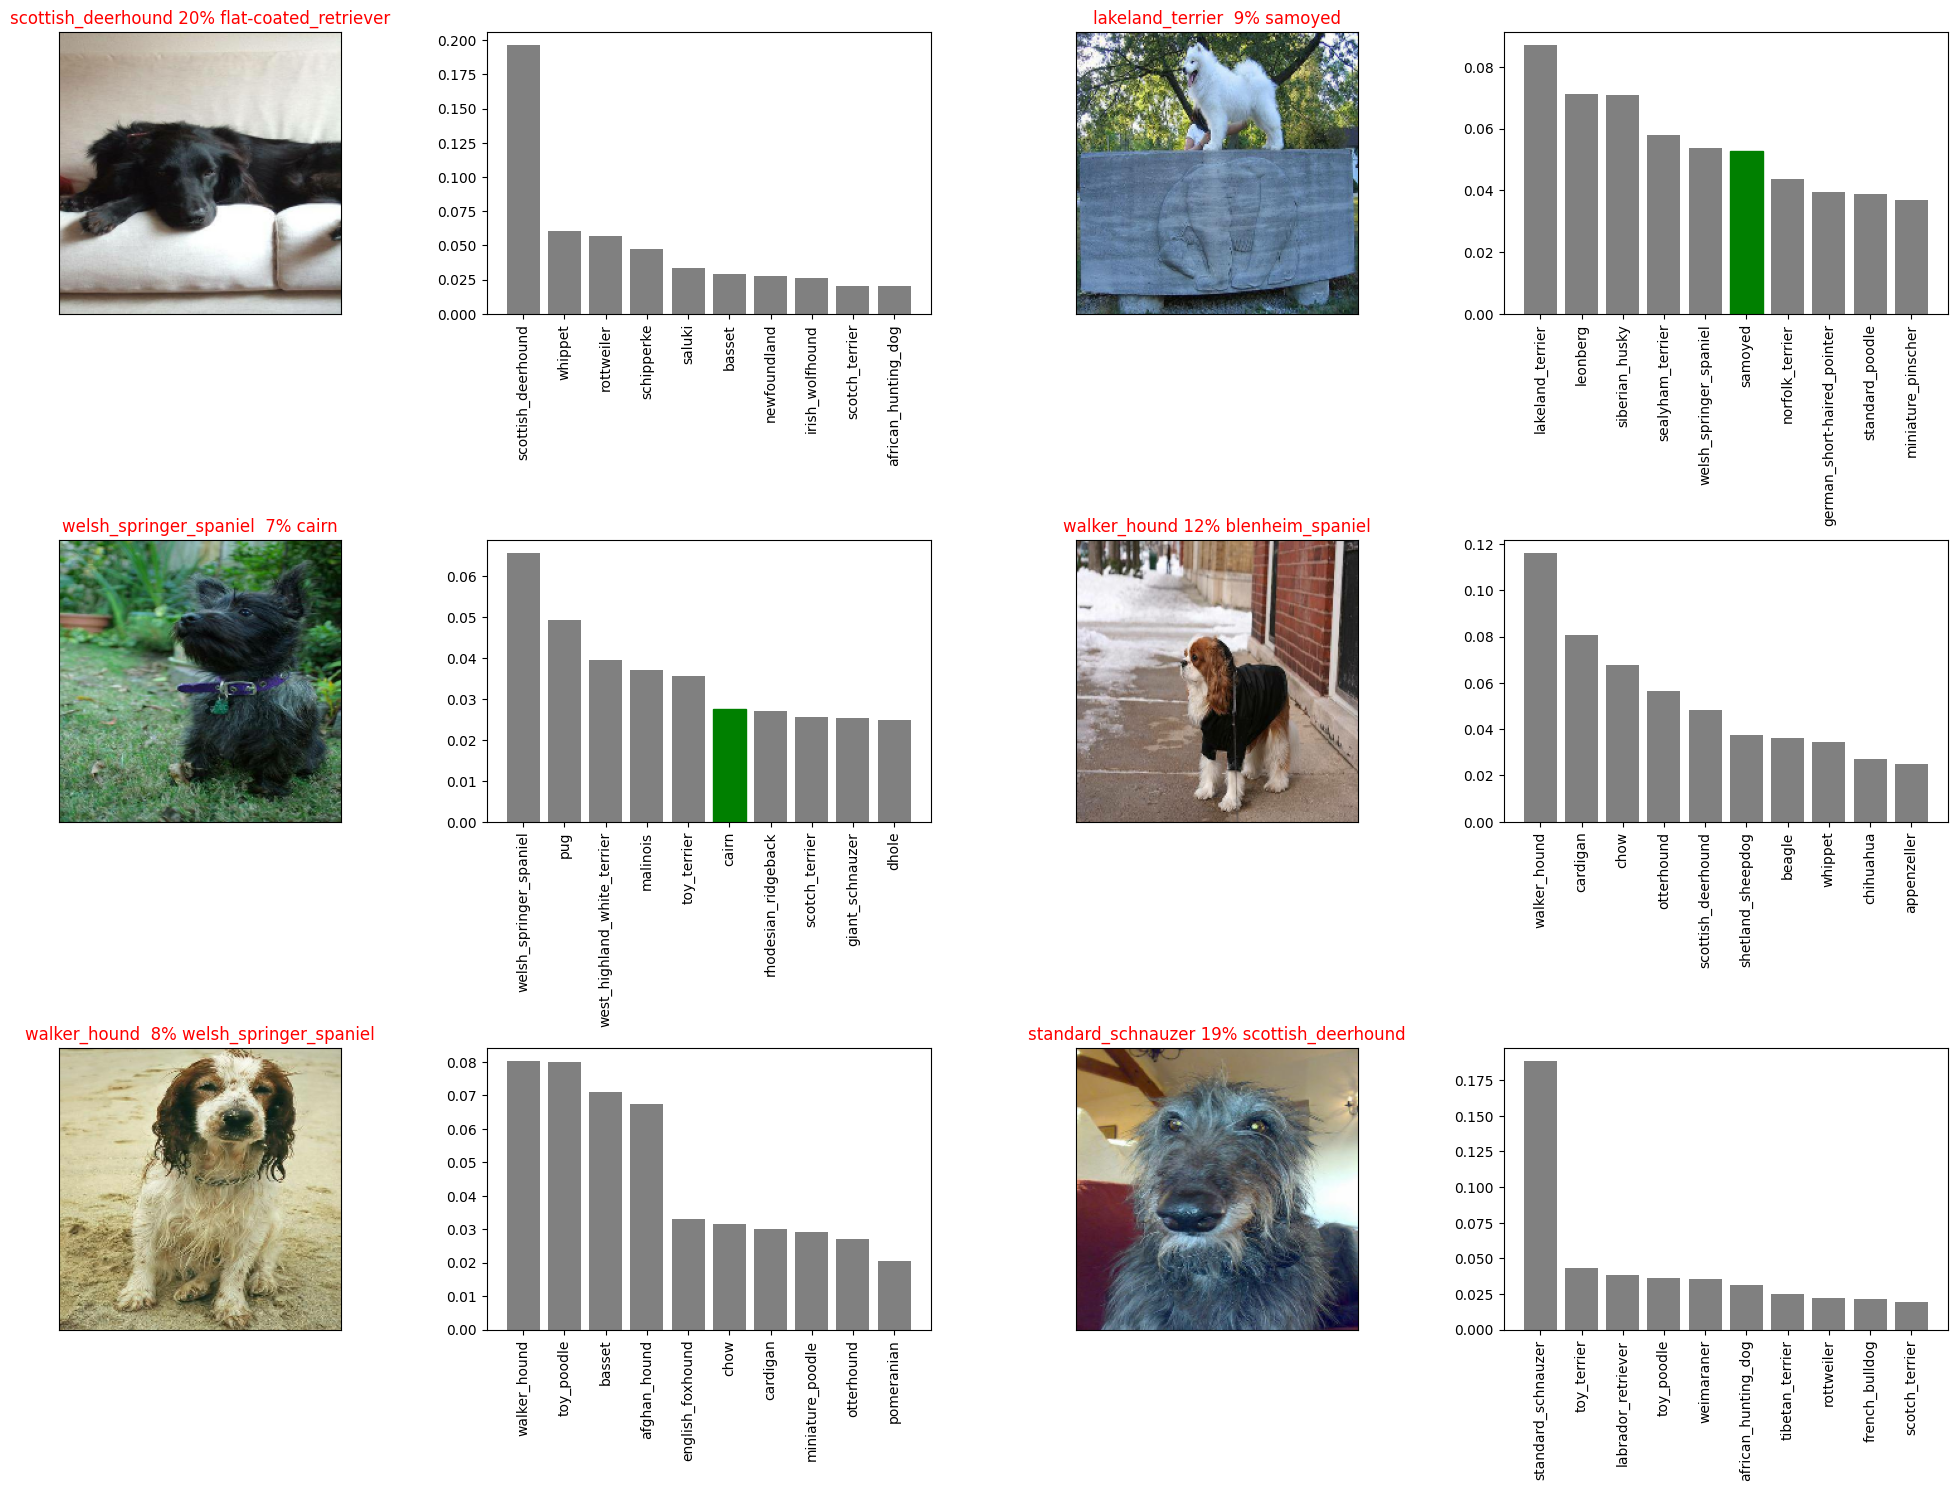

In [83]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()


In [84]:
## saving and reloading a trained model;
#create a function to save a model
def save_model(model,suffix=None):
  """
  saves a given model in a models directory and appends a suffix(string)
  """
  #create a model directory pathname with current time
  modeldir=os.path.join("drive/MyDrive/Dog_Vision/models",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path=modeldir+"_"+suffix+".h5" #save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [85]:
#creare a function to load a trained model:
def load_model(model_path):
  print(f"Loading saved model from: {model_path}")
  model=tfk.models.load_model(model_path,
                              custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [86]:
#save our model trained on 1000 images
save_model(model,suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/MyDrive/Dog_Vision/models/20250130-181215_1000-images-mobilenetv2-Adam.h5...


/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/Dog_Vision/models/20250130-181215_1000-images-mobilenetv2-Adam.h5'

In [87]:
# load atrained model

loaded_1000_image_model=load_model("drive/MyDrive/Dog_Vision/models/20250129-130549_1000-images-mobilenetv2-Adam.h5")

Loading saved model from: drive/MyDrive/Dog_Vision/models/20250129-130549_1000-images-mobilenetv2-Adam.h5


In [88]:
# evaluate the pre-saved model

model.evaluate(val_data)

7/7 [==============================] - 10s 1s/step - loss: 5.5751 - accuracy: 0.0150


[5.575130462646484, 0.014999999664723873]

In [89]:
#evaluate the loaded model

loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 12s 1s/step - loss: 5.8766 - accuracy: 0.0000e+00


[5.876623153686523, 0.0]

In [90]:
# training a big dog model (on the full data):

len(X),len(y)



(10222, 10222)

In [91]:
X[:10]

['drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog_Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog_Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog_Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog_Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog_Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog_Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog_Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog_Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [92]:
len(X_train)

800

In [93]:
# create a data batch with the full data set

full_data=create_data_batches(X,y)

Creating training data batches...


In [94]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [95]:
#create a model for full model

full_model=create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [96]:
# create full model callbacks

full_model_tensorboard=create_tensorboard_callback()
#no validation set when training on all the data,so we can't monitor validaton accuracy

full_model_early_stopping=tfk.callbacks.EarlyStopping(monitor="accuracy",
patience=3)


In [97]:
# # fit the full model to full data
# full_model.fit(x=full_data,
#                epochs=NUM_EPOCHS,
#                callbacks=[full_model_tensorboard,full_model_early_stopping])

In [98]:
save_model(full_model,suffix="full-image-set-mobilenetv2-Adam")

Saving model to: drive/MyDrive/Dog_Vision/models/20250130-181243_full-image-set-mobilenetv2-Adam.h5...


'drive/MyDrive/Dog_Vision/models/20250130-181243_full-image-set-mobilenetv2-Adam.h5'

In [99]:
#load in the full model

loaded_full_model=load_model("drive/MyDrive/Dog_Vision/models/20250130-151043_full-image-set-mobilenetv2-Adam.h5")

Loading saved model from: drive/MyDrive/Dog_Vision/models/20250130-151043_full-image-set-mobilenetv2-Adam.h5


In [100]:
# 254) making prediction on test images;
##Load test image filenames:

test_path="drive/MyDrive/Dog_Vision/test/"

test_filenames=[test_path+fname for fname in os.listdir(test_path)]


In [101]:
test_filenames[:10]

['drive/MyDrive/Dog_Vision/test/e265af5e8f446888c6e7ec31f803d63e.jpg',
 'drive/MyDrive/Dog_Vision/test/e5fa615e36dc3b2b3f554aa5097a6ece.jpg',
 'drive/MyDrive/Dog_Vision/test/e596c0d97b381e876d46dda2eb60074c.jpg',
 'drive/MyDrive/Dog_Vision/test/e43f6e621469f438f351d31d889b839f.jpg',
 'drive/MyDrive/Dog_Vision/test/e39be68f3200f0ecde589e571ae6df06.jpg',
 'drive/MyDrive/Dog_Vision/test/e312dda8d35118c40880c0f331c09509.jpg',
 'drive/MyDrive/Dog_Vision/test/e5b14b20ee8ac070bf5cea3b640f3dde.jpg',
 'drive/MyDrive/Dog_Vision/test/e4b76574d24800b91bdcfc886fb74f23.jpg',
 'drive/MyDrive/Dog_Vision/test/ddbdd621e79563a56443a0dd1ee4c48d.jpg',
 'drive/MyDrive/Dog_Vision/test/ddfbebe13aa8fba30f347c58466215df.jpg']

In [102]:
#create test data batches;

test_data=create_data_batches(test_filenames,test_data=True)


Creating test data batches...


In [103]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# make predictions on test data batch using the loaded full model
# test_predictions=loaded_full_model.predict(test_data,verbose=1)

  4/324 [..............................] - ETA: 11:27

In [120]:
# save predictons(Numpy array) to csv file (For access later)
# np.savetxt("drive/MyDrive/Dog_Vision/preds_array.csv",
#            test_predictions,
#            delimiter=",")

In [121]:
# load predictions (numpy array) to csv file
test_predictions=np.loadtxt("drive/MyDrive/Dog_Vision/preds_array.csv",
                            delimiter=",")

In [122]:
# test_predictions[:10]

In [110]:
test_predictions # 10357 test images with  different prediction probabilities

array([[1.06141599e-07, 2.31749800e-06, 1.35067753e-08, ...,
        5.14940801e-09, 4.42352437e-04, 4.29075214e-07],
       [2.39941400e-09, 1.13311069e-10, 2.59180482e-08, ...,
        1.48978188e-07, 4.76594721e-07, 4.96320297e-07],
       [1.68996497e-08, 2.86312115e-06, 5.50088057e-12, ...,
        1.47005894e-10, 3.23993032e-09, 1.12522797e-10],
       ...,
       [7.60002006e-10, 1.23215577e-10, 4.20451055e-13, ...,
        9.77062940e-14, 3.60493094e-11, 8.56164098e-13],
       [1.30702907e-10, 9.12888404e-15, 2.06135803e-10, ...,
        6.84464855e-13, 4.51335427e-11, 2.97071829e-13],
       [9.86787319e-11, 5.22175303e-10, 8.78617445e-09, ...,
        2.14650238e-12, 7.72754291e-11, 4.20918217e-10]])

In [123]:
["id"]+list(unique_breeds)

['id',
 'affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenen

In [124]:
# preparing  test dataset predictons fro kaggel

#create a pandas dataframe with empty columns

preds_df=pd.DataFrame(columns=["id"]+list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [125]:
test_filenames

['drive/MyDrive/Dog_Vision/test/e265af5e8f446888c6e7ec31f803d63e.jpg',
 'drive/MyDrive/Dog_Vision/test/e5fa615e36dc3b2b3f554aa5097a6ece.jpg',
 'drive/MyDrive/Dog_Vision/test/e596c0d97b381e876d46dda2eb60074c.jpg',
 'drive/MyDrive/Dog_Vision/test/e43f6e621469f438f351d31d889b839f.jpg',
 'drive/MyDrive/Dog_Vision/test/e39be68f3200f0ecde589e571ae6df06.jpg',
 'drive/MyDrive/Dog_Vision/test/e312dda8d35118c40880c0f331c09509.jpg',
 'drive/MyDrive/Dog_Vision/test/e5b14b20ee8ac070bf5cea3b640f3dde.jpg',
 'drive/MyDrive/Dog_Vision/test/e4b76574d24800b91bdcfc886fb74f23.jpg',
 'drive/MyDrive/Dog_Vision/test/ddbdd621e79563a56443a0dd1ee4c48d.jpg',
 'drive/MyDrive/Dog_Vision/test/ddfbebe13aa8fba30f347c58466215df.jpg',
 'drive/MyDrive/Dog_Vision/test/e745d75a74a9cbdc917e7775febd88e8.jpg',
 'drive/MyDrive/Dog_Vision/test/f3d2b254424ab99c267abc3ab22ba627.jpg',
 'drive/MyDrive/Dog_Vision/test/f1167eabf53759dad015f0abb813a451.jpg',
 'drive/MyDrive/Dog_Vision/test/ea5ae600ca3996528b6548eceac767cf.jpg',
 'driv

In [126]:
# appedn test image ID's to predicton DataFrame

test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e265af5e8f446888c6e7ec31f803d63e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e5fa615e36dc3b2b3f554aa5097a6ece,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e596c0d97b381e876d46dda2eb60074c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e43f6e621469f438f351d31d889b839f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e39be68f3200f0ecde589e571ae6df06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
os.path.splitext(test_filenames[0])

('drive/MyDrive/Dog_Vision/test/e265af5e8f446888c6e7ec31f803d63e', '.jpg')

In [128]:
# add the prediction probabilities to each dog bredd column:
preds_df[list(unique_breeds)]=test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e265af5e8f446888c6e7ec31f803d63e,1.061416e-07,2.317498e-06,1.350678e-08,1.001726e-08,1.253467e-06,1.204450e-06,1.386515e-10,6.153292e-07,3.440290e-09,...,1.067454e-07,3.923352e-07,5.283017e-09,2.156657e-04,5.575261e-07,4.882663e-05,2.962179e-05,5.149408e-09,4.423524e-04,4.290752e-07
1,e5fa615e36dc3b2b3f554aa5097a6ece,2.399414e-09,1.133111e-10,2.591805e-08,1.544489e-10,1.048132e-06,1.236621e-09,9.990883e-08,3.295772e-04,3.924059e-06,...,1.723274e-04,6.284044e-06,4.618935e-09,4.518235e-12,3.210076e-07,1.772828e-07,1.296401e-08,1.489782e-07,4.765947e-07,4.963203e-07
2,e596c0d97b381e876d46dda2eb60074c,1.689965e-08,2.863121e-06,5.500881e-12,5.184442e-08,3.979941e-09,3.520772e-12,8.354494e-14,7.745771e-13,1.533702e-13,...,4.433956e-06,4.931350e-13,3.391345e-10,2.813796e-08,2.159529e-11,5.364397e-13,8.013620e-15,1.470059e-10,3.239930e-09,1.125228e-10
3,e43f6e621469f438f351d31d889b839f,2.041182e-12,1.209804e-10,6.483952e-13,1.369967e-11,2.174167e-11,1.980497e-11,1.519137e-11,6.681433e-10,9.999998e-01,...,3.084958e-13,6.965842e-12,7.340495e-11,2.551367e-09,1.527213e-11,3.806483e-08,1.613743e-10,5.625094e-11,2.381725e-10,3.540974e-12
4,e39be68f3200f0ecde589e571ae6df06,4.634262e-06,3.610958e-09,7.942071e-08,2.062431e-10,8.156373e-10,7.940314e-08,3.805773e-08,2.112708e-08,3.267919e-10,...,3.601485e-06,2.453501e-05,6.318600e-09,8.242985e-10,4.590076e-09,3.418910e-09,1.115688e-06,4.333701e-10,1.095413e-05,1.532214e-03


In [129]:
#save our predictoins dataframe to CSV for submission to kaggle
preds_df.to_csv("drive/MyDrive/Dog_Vision/full_model_predictions_submission_1_mobilenetV2.csv",
              index=False)

In [130]:
# 256) making prediction on custom images:
# get custom image filepaths
custom_path="drive/MyDrive/Dog_Vision/my-dog-photos/"

custom_images_paths=[custom_path+fname for fname in os.listdir(custom_path)]
custom_images_paths


['drive/MyDrive/Dog_Vision/my-dog-photos/dog-photo-3.jpeg',
 'drive/MyDrive/Dog_Vision/my-dog-photos/dog-photo-2.jpeg',
 'drive/MyDrive/Dog_Vision/my-dog-photos/dog-photo-1.jpeg']

In [131]:
# turn custom images into batches

custom_data=create_data_batches(custom_images_paths,test_data=True)

Creating test data batches...


In [132]:
custom_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [133]:
#make predictonns on the custo data
custom_preds=loaded_full_model.predict(custom_data)

1/1 [==============================] - 0s 313ms/step


In [135]:
custom_preds.shape

(3, 120)

In [136]:
# get custom image prediction labels:
custom_pred_labels=[get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['labrador_retriever', 'lakeland_terrier', 'golden_retriever']

In [139]:
# get custom images (our batchify()) function wont work since there arent labels... maybe we could find the later

custom_images=[]
#loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

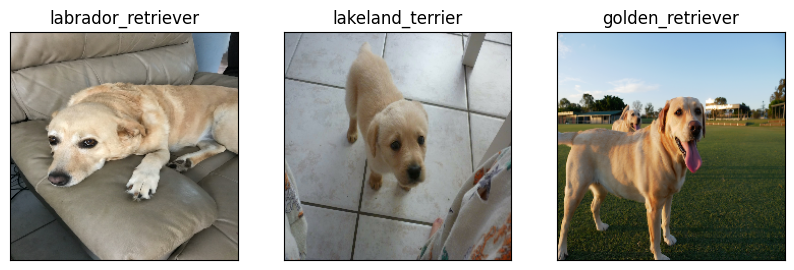

In [140]:
# check custom image predictions
plt.figure(figsize=(10,10))
for i,image in enumerate(custom_images):
  plt.subplot(1,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)